In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [3]:
upsetplot.__file__

'/Users/fairliereese/miniconda3/lib/python3.7/site-packages/upsetplot/__init__.py'

In [4]:
mt_df = pd.read_csv('../data/05_mastertable/master_table_filtering.tsv', sep='\t')
mt_df.rename({'Recount3 Support': 'Recount3'}, axis=1, inplace=True)

## What % of transcripts are remoed by more than one?

In [11]:
# remove fsm and ism
temp = mt_df.loc[~(mt_df.structural_category.isin(['FSM', 'ISM']))]

# rm stuff not filter  out
temp = temp.loc[temp.filter_sharing>0]

temp['rm_more_one'] = temp.filter_sharing>1
temp[['Tool', 'rm_more_one']].groupby('rm_more_one').count()

,Tool
rm_more_one,
False,42984
True,135592


In [12]:
135592/(135592+42984)

0.759295762028492

## Upsetplots

53706
36268


/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "sep" which is no longer supported as of 3.3 and will become an error in 3.6
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "layout" which is no longer supported as of 3.3 and will become an error in 3.6
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


126986
105884


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


7960
7229


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


30110
27866


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


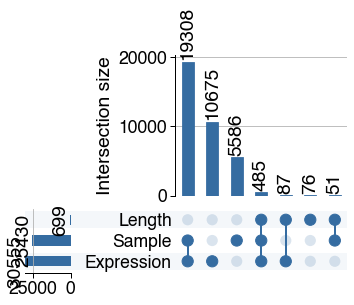

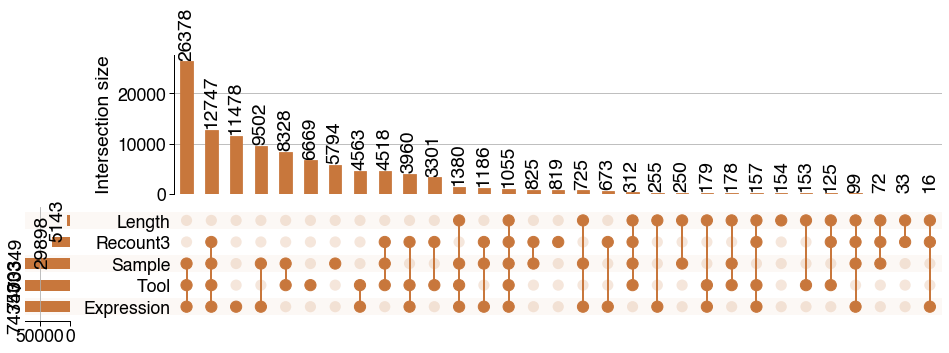

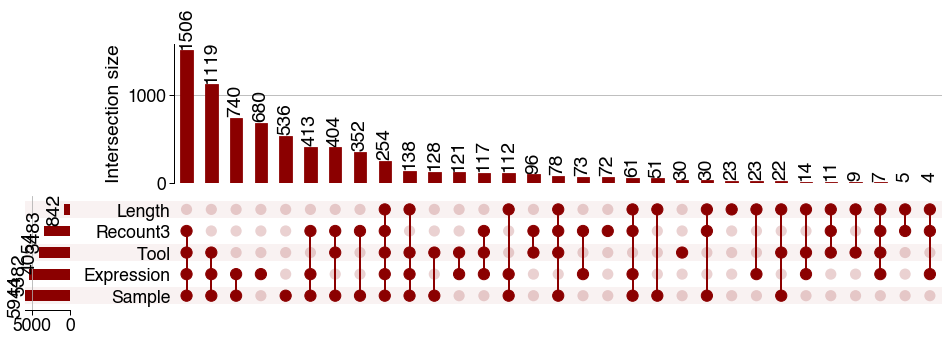

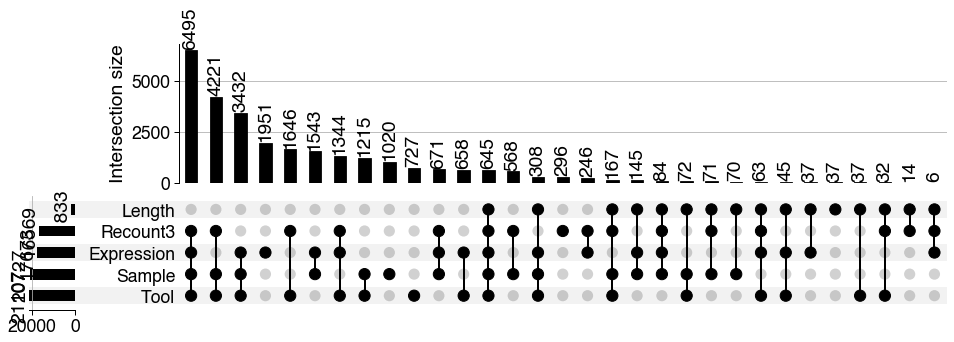

In [7]:
things = ['Length', 'Recount3', 'Sample', 'Tool', 'Expression']
m = {'NIC': ['Length', 'Sample', 'Expression'],
     'NNC': things,
     'Intergenic': things, 
     'Genic': things,
     'Antisense': things,
     'Fusion': things}
groups = [['NIC'],
          ['NNC'],
          ['Intergenic'],
          ['Antisense', 'Fusion', 'Genic']]

c_dict, order = get_novelty_colors()
for g in groups:
    temp = mt_df.loc[mt_df.structural_category.isin(g)].copy(deep=True)
    temp = temp[m[g[0]]]
    
    # remove those passing filters
    print(len(temp.index))
    temp = temp.loc[temp[m[g[0]]].sum(axis=1)>0]
    print(len(temp.index))

    for c in m[g[0]]:
        temp[c] = temp[c].astype(bool)
    temp['isoform'] = [i for i in range(len(temp.index))]
    temp.set_index(m[g[0]], inplace=True)

    init_plot_settings(font_scale=1.2)
    color = c_dict[g[0]]
    if len(g) > 1:
        color = 'k'
    upset = upsetplot.UpSet(temp, sort_by='cardinality', show_counts=True, #show_counts=True,
                            facecolor=color)  # disable the default bar chart
    upset.plot()
    plt.savefig(f'{g[0]}_filter_sharing.pdf', sep=500, layout='tight')